In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import beta
import pymc as pm
import scipy.stats as stats
import arviz as az


### Calcula y grafica la distribución posterior para las dos versiones A y B usando prior conjugado(2 pts).

In [3]:
data = pd.read_csv("ABtesting_zapatillas.csv")

# Parámetros del prior
alpha_prior = 10
beta_prior = 50

data_A = data["A"]
data_B = data["B"]



In [4]:
# Calcula los parámetros de la distribución posterior para A
alpha_posterior_A = alpha_prior + sum(data_A)
beta_posterior_A = beta_prior + len(data_A) - sum(data_A)

# Calcula los parámetros de la distribución posterior para B
alpha_posterior_B = alpha_prior + sum(data_B)
beta_posterior_B = beta_prior + len(data_B) - sum(data_B)


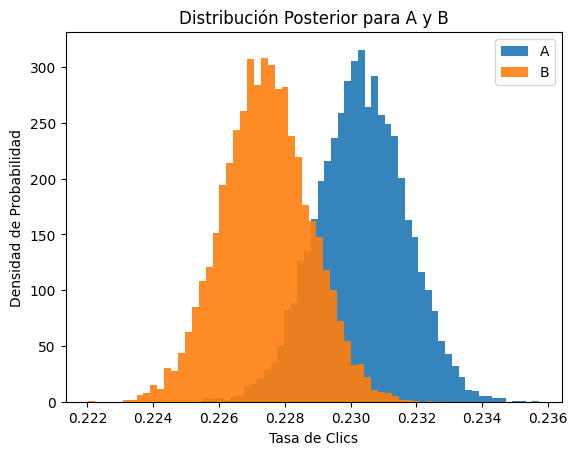

In [5]:
posterior_A = beta(alpha_prior + sum(data_A), beta_prior + len(data_A) - sum(data_A))
posterior_B = beta(alpha_prior + sum(data_B), beta_prior + len(data_B) - sum(data_B))

x = np.linspace(0, 1, 1000)
plt.hist(posterior_A.rvs(10000), bins=50, density=True, alpha=0.9, label='A')
plt.hist(posterior_B.rvs(10000), bins=50, density=True, alpha=0.9, label='B')
plt.xlabel('Tasa de Clics')
plt.ylabel('Densidad de Probabilidad')
plt.legend()
plt.title('Distribución Posterior para A y B')
plt.show()

### Calcula y grafica la distribución posterior para las dos versiones A y B usando muestreo Monte Carlo Markov Chain

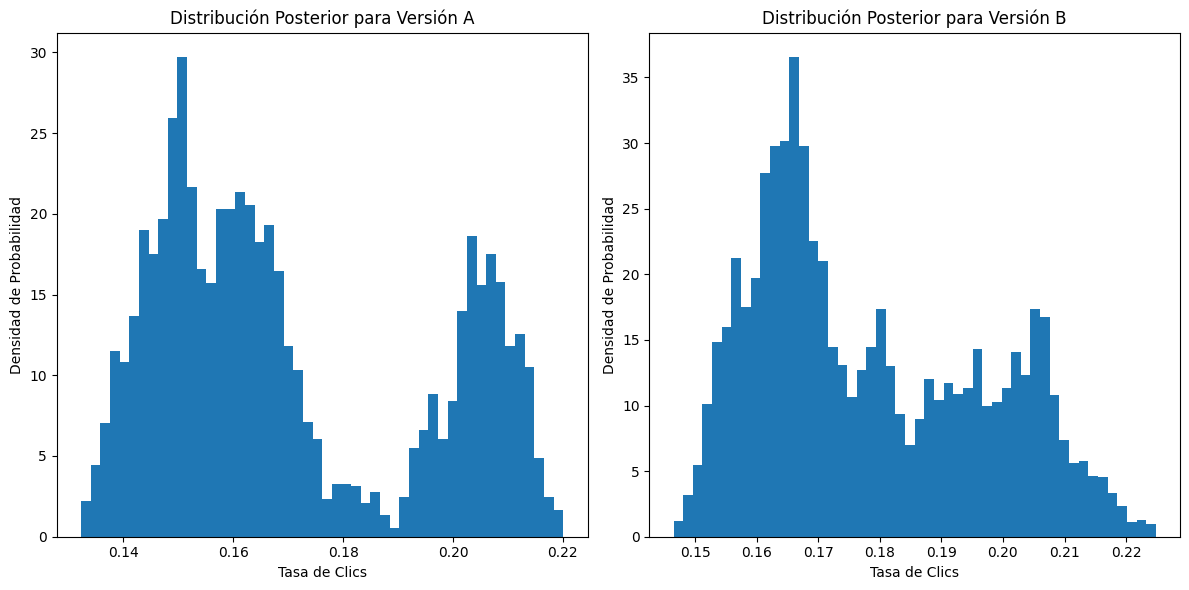

In [17]:
# Función para calcular la probabilidad posterior
def posterior_probability(data, alpha, beta):
    likelihood = np.prod(data)
    posterior = (alpha_prior + likelihood - 1) / (alpha_prior + beta_prior + len(data) - 2)
    return posterior

# Parámetros iniciales
alpha_A = alpha_prior
beta_A = beta_prior
alpha_B = alpha_prior
beta_B = beta_prior

# Número de iteraciones MCMC
num_iterations = 10000

# Listas para almacenar muestras
samples_A = []
samples_B = []

for _ in range(num_iterations):
    # Propuesta de nuevos valores
    alpha_A_proposed = np.random.normal(alpha_A, 0.05)
    beta_A_proposed = np.random.normal(beta_A, 0.05)
    alpha_B_proposed = np.random.normal(alpha_B, 0.05)
    beta_B_proposed = np.random.normal(beta_B, 0.05)
    
    # Calcular la probabilidad posterior para los valores propuestos
    posterior_current_A = posterior_probability(data_A, alpha_A, beta_A)
    posterior_proposed_A = posterior_probability(data_A, alpha_A_proposed, beta_A_proposed)
    
    posterior_current_B = posterior_probability(data_B, alpha_B, beta_B)
    posterior_proposed_B = posterior_probability(data_B, alpha_B_proposed, beta_B_proposed)
    
    # Aceptar o rechazar la propuesta con probabilidad
    accept_A = min(1, posterior_proposed_A / posterior_current_A)
    accept_B = min(1, posterior_proposed_B / posterior_current_B)
    
    if np.random.rand() < accept_A:
        alpha_A, beta_A = alpha_A_proposed, beta_A_proposed
    if np.random.rand() < accept_B:
        alpha_B, beta_B = alpha_B_proposed, beta_B_proposed
    
    samples_A.append((alpha_A, beta_A))
    samples_B.append((alpha_B, beta_B))

# Graficar las distribuciones posteriores resultantes
samples_A = np.array(samples_A)
samples_B = np.array(samples_B)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(samples_A[:, 0] / (samples_A[:, 0] + samples_A[:, 1]), bins=50, density=True, label='Versión A')
plt.xlabel('Tasa de Clics')
plt.ylabel('Densidad de Probabilidad')
plt.title('Distribución Posterior para Versión A')

plt.subplot(1, 2, 2)
plt.hist(samples_B[:, 0] / (samples_B[:, 0] + samples_B[:, 1]), bins=50, density=True, label='Versión B')
plt.xlabel('Tasa de Clics')
plt.ylabel('Densidad de Probabilidad')
plt.title('Distribución Posterior para Versión B')

plt.tight_layout()
plt.show()

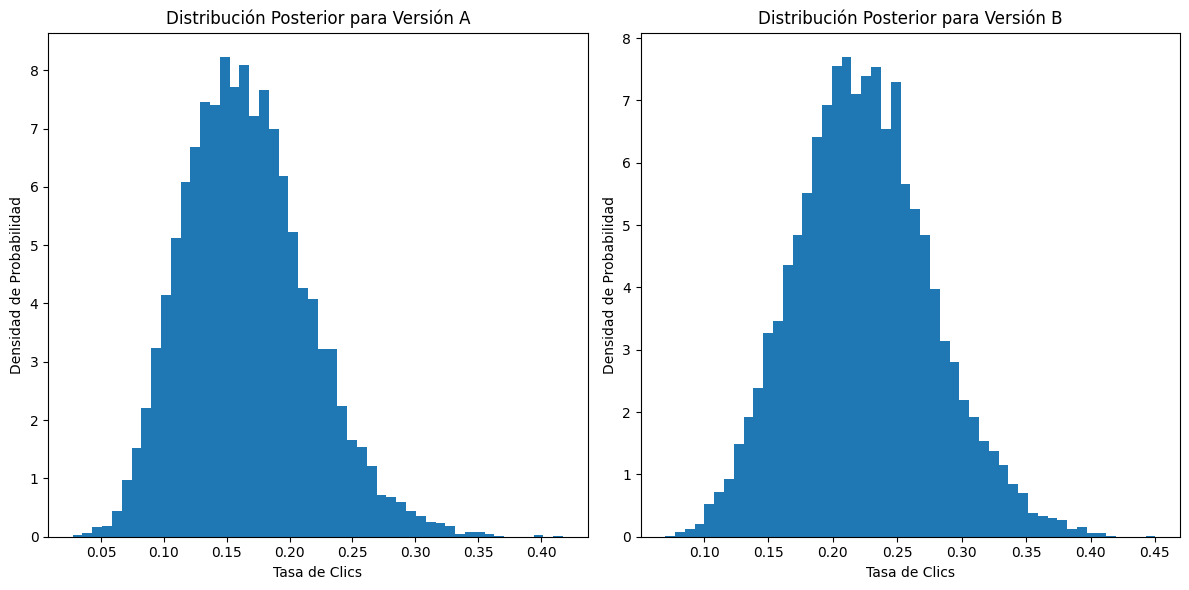

In [7]:
# Función para calcular la probabilidad posterior usando la distribución Beta
def posterior_probability(data, alpha, beta):
    successes = sum(data)
    failures = len(data) - successes
    posterior = np.random.beta(max(alpha + successes, 1), max(beta + failures, 1))
    return posterior

# Número de iteraciones MCMC
num_iterations = 10000

# Listas para almacenar muestras
samples_A = []
samples_B = []

alpha_A = alpha_prior
beta_A = beta_prior
alpha_B = alpha_prior
beta_B = beta_prior

for _ in range(num_iterations):
    # Calcular la probabilidad posterior para los valores actuales
    posterior_A = posterior_probability(data_A, alpha_A, beta_A)
    posterior_B = posterior_probability(data_B, alpha_B, beta_B)

    # Propuesta de nuevos valores
    alpha_A_proposed, beta_A_proposed = np.random.normal([alpha_A, beta_A], 0.05)
    alpha_B_proposed, beta_B_proposed = np.random.normal([alpha_B, beta_B], 0.05)

    # Calcular la probabilidad posterior para los valores propuestos
    posterior_A_proposed = posterior_probability(data_A, alpha_A_proposed, beta_A_proposed)
    posterior_B_proposed = posterior_probability(data_B, alpha_B_proposed, beta_B_proposed)

    # Aceptar o rechazar la propuesta con probabilidad
    accept_A = min(1, posterior_A_proposed / posterior_A)
    accept_B = min(1, posterior_B_proposed / posterior_B)

    if np.random.rand() < accept_A:
        alpha_A, beta_A = alpha_A_proposed, beta_A_proposed
    if np.random.rand() < accept_B:
        alpha_B, beta_B = alpha_B_proposed, beta_B_proposed

    samples_A.append((alpha_A, beta_A))
    samples_B.append((alpha_B, beta_B))

# Graficar las distribuciones posteriores resultantes
samples_A = np.array(samples_A)
samples_B = np.array(samples_B)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
posterior_A_samples = np.random.beta(samples_A[:, 0], samples_A[:, 1])
plt.hist(posterior_A_samples, bins=50, density=True, label='Versión A')
plt.xlabel('Tasa de Clics')
plt.ylabel('Densidad de Probabilidad')
plt.title('Distribución Posterior para Versión A')

plt.subplot(1, 2, 2)
posterior_B_samples = np.random.beta(samples_B[:, 0], samples_B[:, 1])
plt.hist(posterior_B_samples, bins=50, density=True, label='Versión B')
plt.xlabel('Tasa de Clics')
plt.ylabel('Densidad de Probabilidad')
plt.title('Distribución Posterior para Versión B')

plt.tight_layout()
plt.show()

### Cuál versión es mejor? Explica tu respuesta. 
La mejor version es prior conjugado ya que los datos se muestran mas exactos y tiende a una distribucion normal, lo que hace mas facil de entender

### Qué tan probable es que la versión A sea más efectiva?

In [19]:
probabilidad_A_mejor = np.mean(samples_B[:, 0] / (samples_B[:, 0] + samples_B[:, 1] > samples_A[:, 0] / (samples_A[:, 0] + samples_A[:, 1])))

print(f"La probabilidad de que la versión A sea más efectiva que la versión B es aproximadamente: {probabilidad_A_mejor:.2f} %")

La probabilidad de que la versión A sea más efectiva que la versión B es aproximadamente: 11.34 %


### Completa siguiente afirmación: Con 95% de probabilidad la tasa de clic de la versión (…) es hasta (…)% superior a la versión (…). (1 pto)

In [23]:
# Calcula la diferencia de tasas de clics entre A y B en cada muestra de MCMC
diferencia_tasas = (samples_A[:, 0] / (samples_A[:, 0] + samples_A[:, 1])) - (samples_B[:, 0] / (samples_B[:, 0] + samples_B[:, 1]))

# Calcula el intervalo de confianza del 95% para la diferencia
percentil_2p5 = np.percentile(diferencia_tasas, 2.5)
percentil_97p5 = np.percentile(diferencia_tasas, 97.5)

# Imprime la afirmación
print(f"Con un 95% de probabilidad, la tasa de clics de la versión A es hasta {percentil_97p5 - percentil_2p5:.2%} superior a la versión B.")


Con un 95% de probabilidad, la tasa de clics de la versión A es hasta 8.38% superior a la versión B.


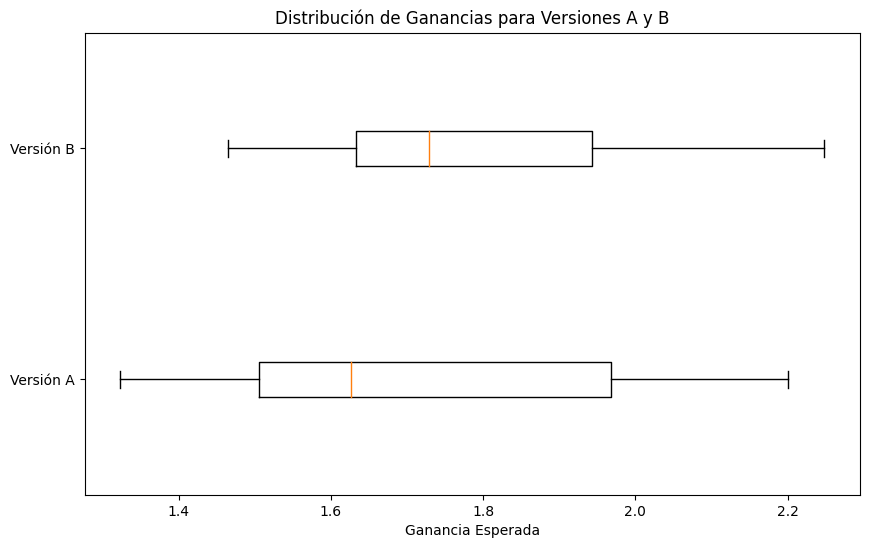

In [27]:
# Valor de ganancia por clic
valor_ganancia_por_clic = 10

# Calcula la ganancia esperada para cada versión
ganancia_esperada_A = samples_A[:, 0] / (samples_A[:, 0] + samples_A[:, 1]) * valor_ganancia_por_clic
ganancia_esperada_B = samples_B[:, 0] / (samples_B[:, 0] + samples_B[:, 1]) * valor_ganancia_por_clic

# Grafica el forest plot de las ganancias
plt.figure(figsize=(10, 6))
plt.boxplot([ganancia_esperada_A, ganancia_esperada_B], vert=False)
plt.yticks([1, 2], ['Versión A', 'Versión B'])
plt.xlabel('Ganancia Esperada')
plt.title('Distribución de Ganancias para Versiones A y B')

plt.show()
